# Supervised and unsupervised classification overview
Simple introduction on how classification may be useful for sentiment analysis

In [1]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm

## Collect some data

In [2]:
import json

In [3]:
review_data_file = '../lexicon/data/yelp_sample.json'
with open(review_data_file, 'r') as infile:
    R = json.load(infile)

In [6]:
len(R)

10000

In [5]:
R[0]

{'content': "Red, white and bleu salad was super yum and a great addition to the menu! This location was clean with great service and food served at just the right temps! Kids pizza is always a hit too with lots of great side dish options for the kiddos! When I'm on this side of town, this will definitely be a spot I'll hit up again!",
 'date': '2014-02-17',
 'stars': 4,
 'useful': 1,
 'funny': 0,
 'cool': 0,
 'business': 'Ue6-WhXvI-_1xUIuapl0zQ',
 'id': '----X0BIDP9tA49U3RvdSQ',
 'categories': ['American (Traditional)', 'Burgers', 'Restaurants']}

## Task: guess the number of stars for each review

In [7]:
target_values = set([doc['stars'] for doc in R])
target_values

{1, 2, 3, 4, 5}

## Indexing

In [11]:
from nltk.tokenize import word_tokenize
from string import punctuation
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler

In [16]:
def tokenize(document):
    return [x.lower() for x in word_tokenize(document) if x not in punctuation]

In [24]:
vectorizer = TfidfVectorizer(tokenizer=tokenize)
X = vectorizer.fit_transform([x['content'] for x in R]).toarray() # dense to sparse
y = [x['stars'] for x in R]

In [25]:
features = vectorizer.get_feature_names_out()

In [26]:
features[:10]

array(["''", "'08", "'1921", "'20", "'60", "'90s", "'against", "'all",
       "'anti-sell", "'antica"], dtype=object)

## Unsupervised classification
We check to what extent clustering may help

In [27]:
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline

In [28]:
ucls = Pipeline([('scaler', MinMaxScaler()), ('kmeans', KMeans(n_clusters=len(target_values)))])

In [29]:
y_pred = ucls.fit_predict(X, y)

In [30]:
print(y[:10])
print(y_pred[:10])

[4, 4, 5, 5, 5, 5, 4, 1, 5, 2]
[4 4 4 4 4 3 0 0 2 0]


### Show some statistics about clusters
Let's collect the real stars of documents per cluster

In [31]:
from collections import defaultdict

In [32]:
cluster_stars = defaultdict(list)
for i, k in enumerate(y_pred):
    cluster_stars[k].append(y[i])

In [33]:
import matplotlib.pyplot as plt

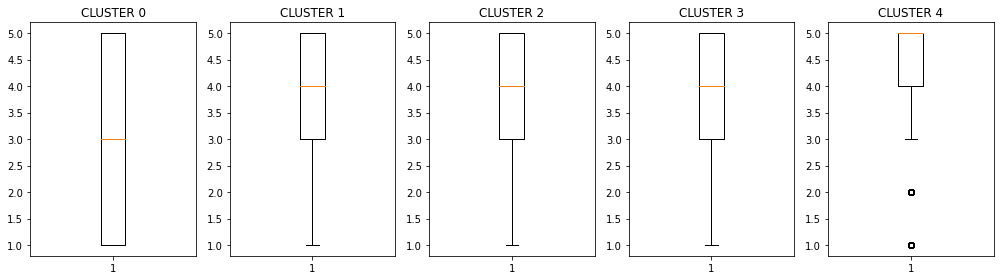

In [35]:
fig, ax = plt.subplots(figsize=(14, 4), ncols=len(cluster_stars))
for k, stars in cluster_stars.items():
    ax[k].boxplot(stars)
    ax[k].set_title('CLUSTER {}'.format(k))
plt.tight_layout()
plt.show()

### Cluster evaluation

## Supervised classification

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [38]:
scls = Pipeline([('scaler', MinMaxScaler()), ('nb', MultinomialNB())])
scls.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()), ('nb', MultinomialNB())])

In [39]:
y_pred = scls.predict(X_test)

### Evaluation

In [40]:
from sklearn.metrics import classification_report

In [41]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.78      0.48      0.59       366
           2       0.13      0.01      0.02       196
           3       0.10      0.01      0.01       270
           4       0.42      0.22      0.29       612
           5       0.50      0.91      0.65      1056

    accuracy                           0.51      2500
   macro avg       0.39      0.33      0.31      2500
weighted avg       0.45      0.51      0.44      2500



# Task 2: what are the options to improve?